<a href="https://colab.research.google.com/github/Jhansi2226/TASK2MallCustomerClustering/blob/main/TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
dataset_url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
userdata = pd.read_csv(dataset_url)
print(userdata.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
userdata = userdata.drop('CustomerID', axis=1)
userdata = userdata.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(userdata[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


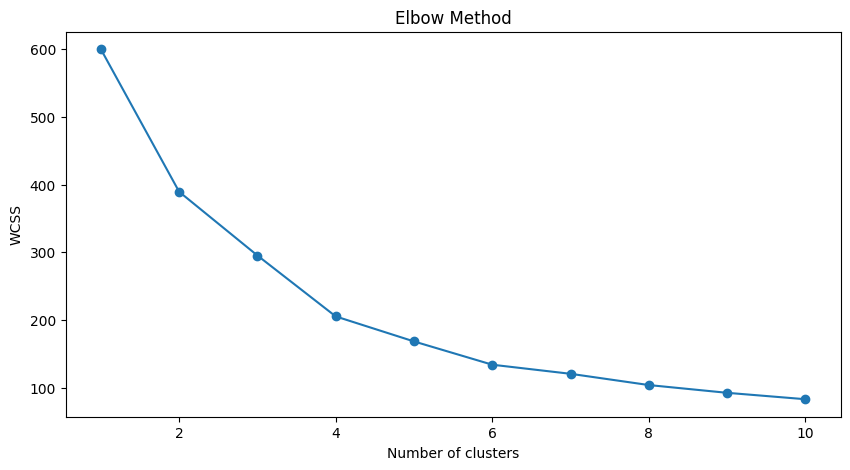

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()









In [ ]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
userdata['Cluster'] = kmeans.fit_predict(scaled_data)


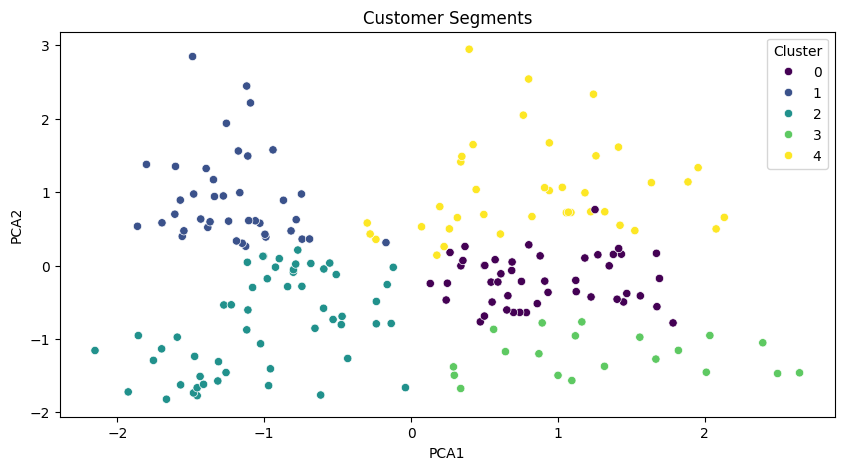

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)
userdata['PCA1'] = data_pca[:, 0]
userdata['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=userdata, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()


In [ ]:
print("Cluster Centers: ")
print(kmeans.cluster_centers_)

print("\nNumber of customers in each cluster: ")
print(userdata['Cluster'].value_counts())


Cluster Centers: 
[[ 1.20484056 -0.23577338 -0.05236781]
 [-0.42880597  0.97484722  1.21608539]
 [-0.98067852 -0.74305983  0.46744035]
 [ 0.5310735  -1.2905084  -1.23646671]
 [ 0.07333084  0.97494509 -1.19729675]]

Number of customers in each cluster: 
Cluster
2    54
0    47
1    40
4    39
3    20
Name: count, dtype: int64
